In [3]:
!pip install tensorflow


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout

In [23]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)
print(df.head())
data = df[['Close']]  # This defines 'data'


         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1  2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2  2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3  2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4  2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   

   Turnover (Lacs)  
0          7162.35  
1         11859.95  
2          5248.60  
3          5503.90  
4          7999.55  


# normalize the data

In [25]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)

In [29]:
prediction_days=60
x_train,y_train=[],[]

for i in range(prediction_days,len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i,0])
    y_train.append(scaled_data[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [33]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))  # Prediction of the next closing price

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.fit(x_train, y_train, epochs=25, batch_size=32)


Epoch 1/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 138ms/step - loss: 0.0191
Epoch 2/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0026
Epoch 3/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 135ms/step - loss: 0.0024
Epoch 4/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - loss: 0.0021
Epoch 5/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0020
Epoch 6/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0020
Epoch 7/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0015
Epoch 8/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 133ms/step - loss: 0.0016
Epoch 9/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 131ms/step - loss: 0.0018
Epoch 10/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0018
Epoch 11/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0016
Epoch 12/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0017
Epoch 13/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.0016
Epoch 14/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - loss: 0.0014
Epoch 15/25
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - loss:

# prepare test data for prediction

In [40]:
test_data =scaled_data[-prediction_days:]
x_test=[]

x_test.append(test_data)
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_price=model.predict(x_test)
predicted_price=scaler.inverse_transform(predicted_price)
print(f"predicted next day price:{predicted_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
predicted next day price:116.66


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


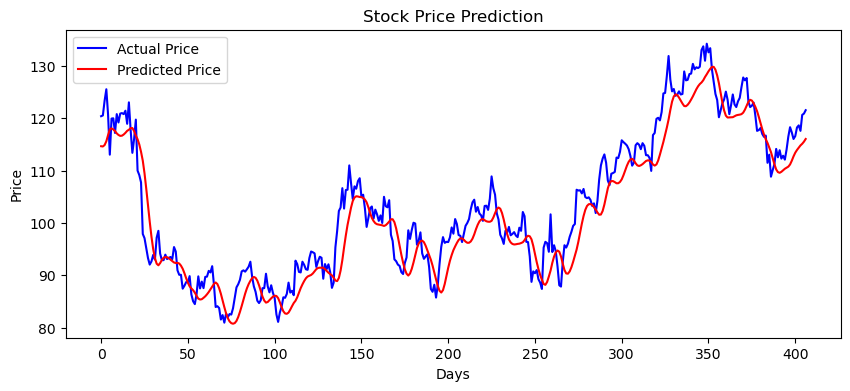

In [46]:
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - prediction_days:]

x_test, y_test = [], []

for i in range(prediction_days, len(test_data)):
    x_test.append(test_data[i - prediction_days:i, 0])
    y_test.append(test_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 4))
plt.plot(y_test_actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
